# **Task-1:-  Blob detection and Image Quality Enhancement.**

In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import feature, color, exposure, restoration

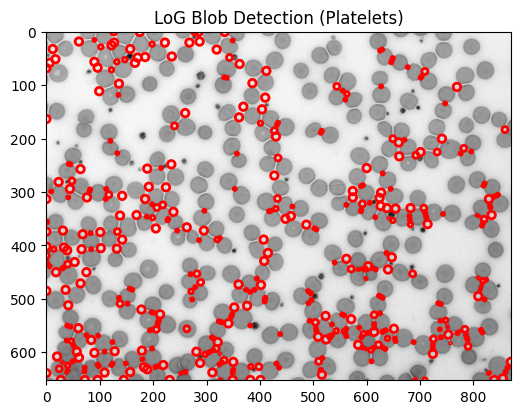

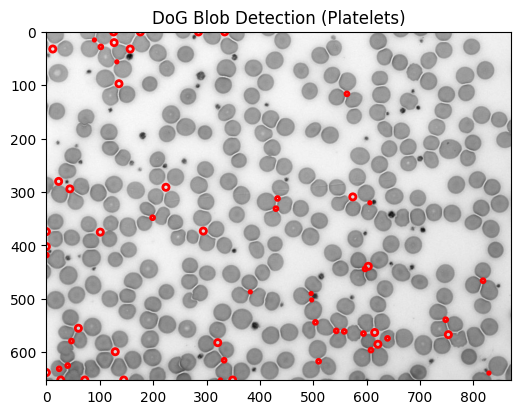

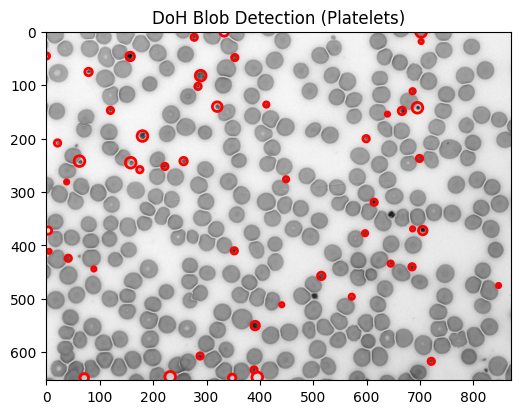

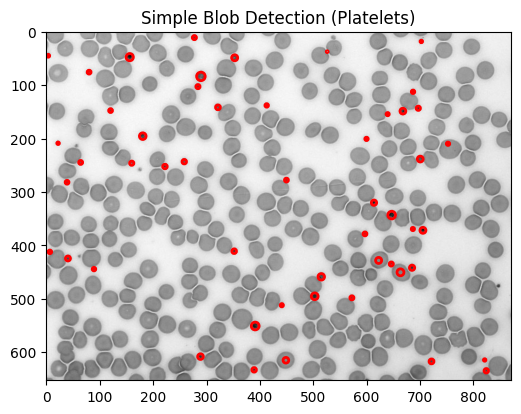

LoG detected 451 platelets
DoG detected 56 platelets
DoH detected 51 platelets
Simple Blob Detector detected 51 platelets


In [37]:
image = cv2.imread('/content/platelets.jpg', cv2.IMREAD_GRAYSCALE)

# Enhance image quality
image_blur = cv2.GaussianBlur(image, (5, 5), 0)  # Reduce noise
image_enhanced = cv2.equalizeHist(image_blur)    # Improve contrast

# 1. Laplacian of Gaussian (LoG) Blob Detection
log_blobs = feature.blob_log(
    image_enhanced,
    min_sigma=1,
    max_sigma=5,
    num_sigma=5,
    threshold=0.15
)
log_blobs[:, 2] = log_blobs[:, 2] * np.sqrt(2)  # Convert sigma to radius

# 2. Difference of Gaussian (DoG) Blob Detection
dog_blobs = feature.blob_dog(
    image_enhanced,
    min_sigma=1,
    max_sigma=5,
    threshold=0.15
)
dog_blobs[:, 2] = dog_blobs[:, 2] * np.sqrt(2)  # Convert sigma to radius

# 3. Determinant of Hessian (DoH) Blob Detection
doh_blobs = feature.blob_doh(
    image_enhanced,
    min_sigma=1,
    max_sigma=10,
    threshold=0.01
)

# 4. Simple Blob Detector
params = cv2.SimpleBlobDetector_Params()
# Set parameters for detecting small purple platelets
params.minThreshold = 10
params.maxThreshold = 30
params.filterByArea = True
params.minArea = 5  # Minimum area for platelets
params.maxArea = 200  # Maximum area for platelets
params.filterByCircularity = True
params.minCircularity = 0.7  # Platelets are somewhat circular
params.filterByConvexity = True
params.minConvexity = 0.8
params.filterByInertia = True
params.minInertiaRatio = 0.2  # Adjust based on platelet shape
params.blobColor = 0  # Detect bright blobs (adjust if platelets are dark)

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
simple_blobs = detector.detect(image_enhanced)
# Convert keypoints to a format compatible with plotting (x, y, size)
simple_blobs_array = np.array([[kp.pt[1], kp.pt[0], kp.size/2] for kp in simple_blobs])

def plot_blobs(image, blobs, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_title(title)
    plt.show()

# Plot results
plot_blobs(image, log_blobs, "LoG Blob Detection (Platelets)")
plot_blobs(image, dog_blobs, "DoG Blob Detection (Platelets)")
plot_blobs(image, doh_blobs, "DoH Blob Detection (Platelets)")
plot_blobs(image, simple_blobs_array, "Simple Blob Detection (Platelets)")

# Print number of detected platelets
print(f"LoG detected {len(log_blobs)} platelets")
print(f"DoG detected {len(dog_blobs)} platelets")
print(f"DoH detected {len(doh_blobs)} platelets")
print(f"Simple Blob Detector detected {len(simple_blobs)} platelets")

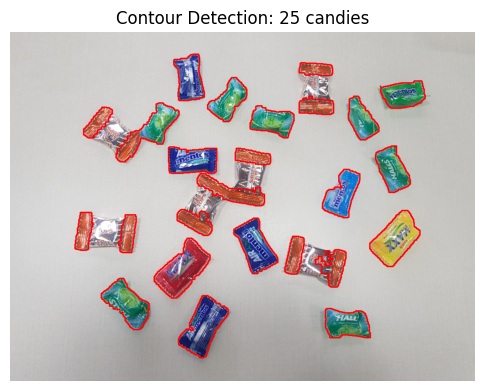

Number of candies detected by contour method: 25

Blob detection results:


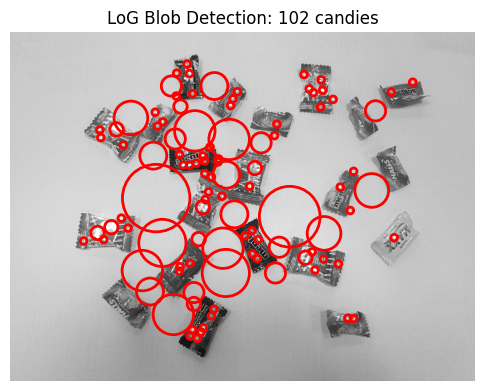

Number of candies detected by LoG: 102


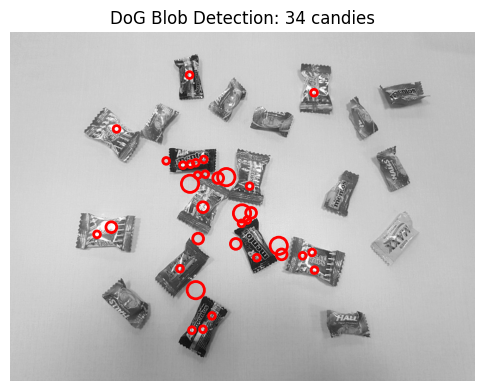

Number of candies detected by DoG: 34


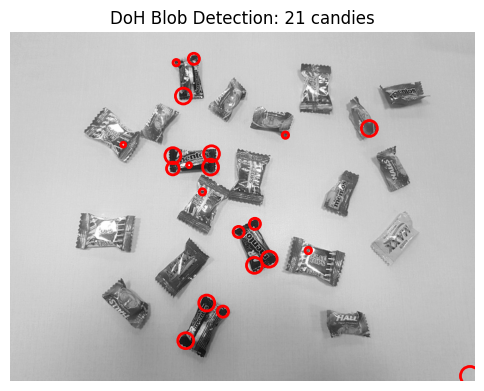

Number of candies detected by DoH: 21


In [ ]:
image = cv2.imread('/content/candy.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_color = np.array([0, 50, 50])
upper_color = np.array([180, 255, 255])
mask = cv2.inRange(image_hsv, lower_color, upper_color)

# Apply morphological operations to clean up the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.dilate(mask, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area to remove noise
min_area = 200
candy_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

output_image = image_rgb.copy()
cv2.drawContours(output_image, candy_contours, -1, (255, 0, 0), 2)

plt.figure(figsize=(6, 6))
plt.imshow(output_image)
plt.title(f"Contour Detection: {len(candy_contours)} candies")
plt.axis('off')
plt.show()
print(f"Number of candies detected by contour method: {len(candy_contours)}")

def plot_blobs(image, blobs, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_title(title)
    plt.axis('off')
    plt.show()

def detect_blobs(image, technique, params):
    if technique == "LoG":
        blobs = feature.blob_log(image, **params)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Convert sigma to radius
    elif technique == "DoG":
        blobs = feature.blob_dog(image, **params)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Convert sigma to radius
    elif technique == "DoH":
        blobs = feature.blob_doh(image, **params)
    return blobs

# Blob detection parameters
blob_params = {
    "LoG": {"min_sigma": 50, "max_sigma": 5, "num_sigma": 10, "threshold": 0.1},
    "DoG": {"min_sigma": 5, "max_sigma": 20, "threshold": 0.1},
    "DoH": {"min_sigma": 5, "max_sigma": 20, "threshold": 0.01}
}

# Apply blob detection techniques
print("\nBlob detection results:")
for technique in ["LoG", "DoG", "DoH"]:
    blobs = detect_blobs(image_gray, technique, blob_params[technique])
    plot_blobs(image_gray, blobs, f"{technique} Blob Detection: {len(blobs)} candies")
    print(f"Number of candies detected by {technique}: {len(blobs)}")

Blob detection on satellite images:


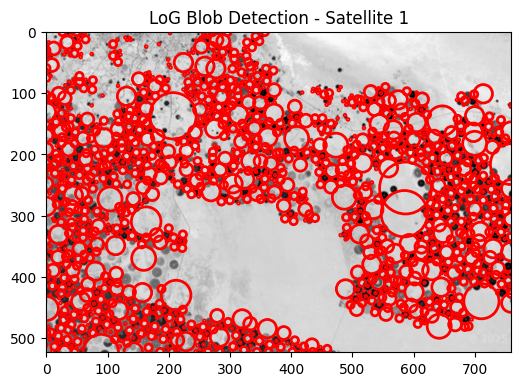

LoG detected 1890 blobs in Satellite 1


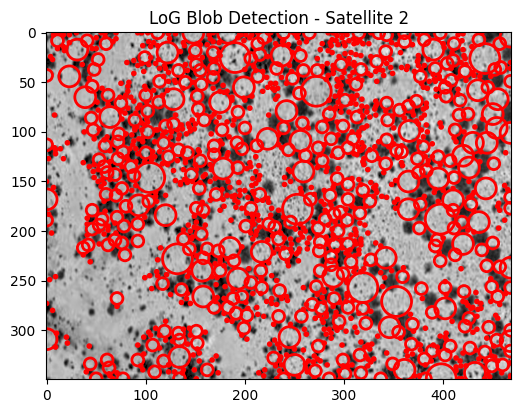

LoG detected 1329 blobs in Satellite 2


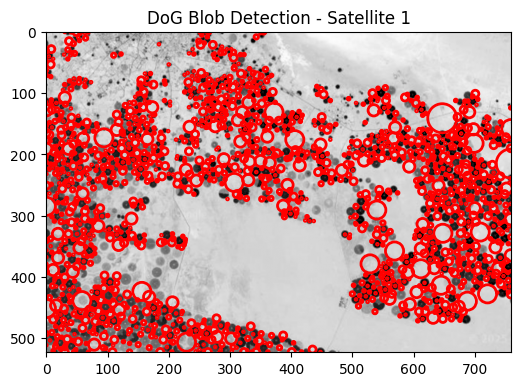

DoG detected 1671 blobs in Satellite 1


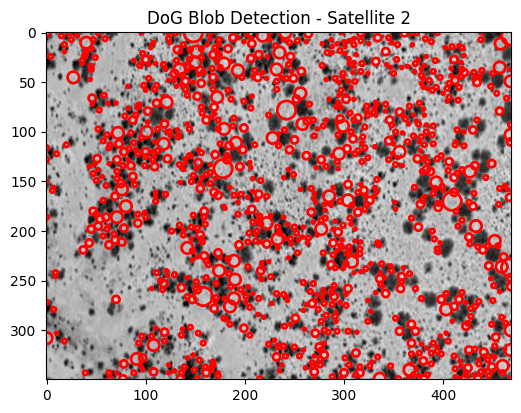

DoG detected 1013 blobs in Satellite 2


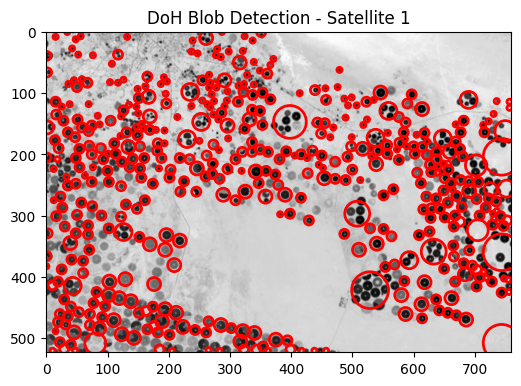

DoH detected 479 blobs in Satellite 1


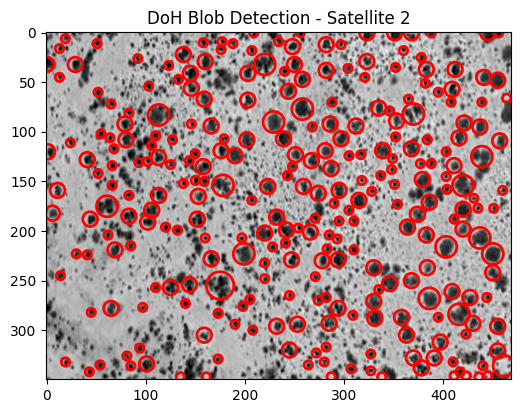

DoH detected 275 blobs in Satellite 2


In [ ]:
satellite1 = cv2.imread('/content/satellite1.png', cv2.IMREAD_GRAYSCALE)
satellite2 = cv2.imread('/content/satellite2.png', cv2.IMREAD_GRAYSCALE)

def plot_blobs(image, blobs, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_title(title)
    plt.show()

def detect_blobs(image, technique, params):
    if technique == "LoG":
        blobs = feature.blob_log(image, **params)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Convert sigma to radius
    elif technique == "DoG":
        blobs = feature.blob_dog(image, **params)
        blobs[:, 2] = blobs[:, 2] * np.sqrt(2)  # Convert sigma to radius
    elif technique == "DoH":
        blobs = feature.blob_doh(image, **params)
    return blobs

# Blob detection parameters
blob_params = {
    "LoG": {"min_sigma": 1, "max_sigma": 30, "num_sigma": 10, "threshold": 0.1},
    "DoG": {"min_sigma": 1, "max_sigma": 30, "threshold": 0.1},
    "DoH": {"min_sigma": 1, "max_sigma": 30, "threshold": 0.01}
}

images = [satellite1, satellite2]
image_names = ["Satellite 1", "Satellite 2"]

print("Blob detection on satellite images:")
for technique in ["LoG", "DoG", "DoH"]:
    for img, name in zip(images, image_names):
        blobs = detect_blobs(img, technique, blob_params[technique])
        plot_blobs(img, blobs, f"{technique} Blob Detection - {name}")
        print(f"{technique} detected {len(blobs)} blobs in {name}")

Processing /content/flower.jpg


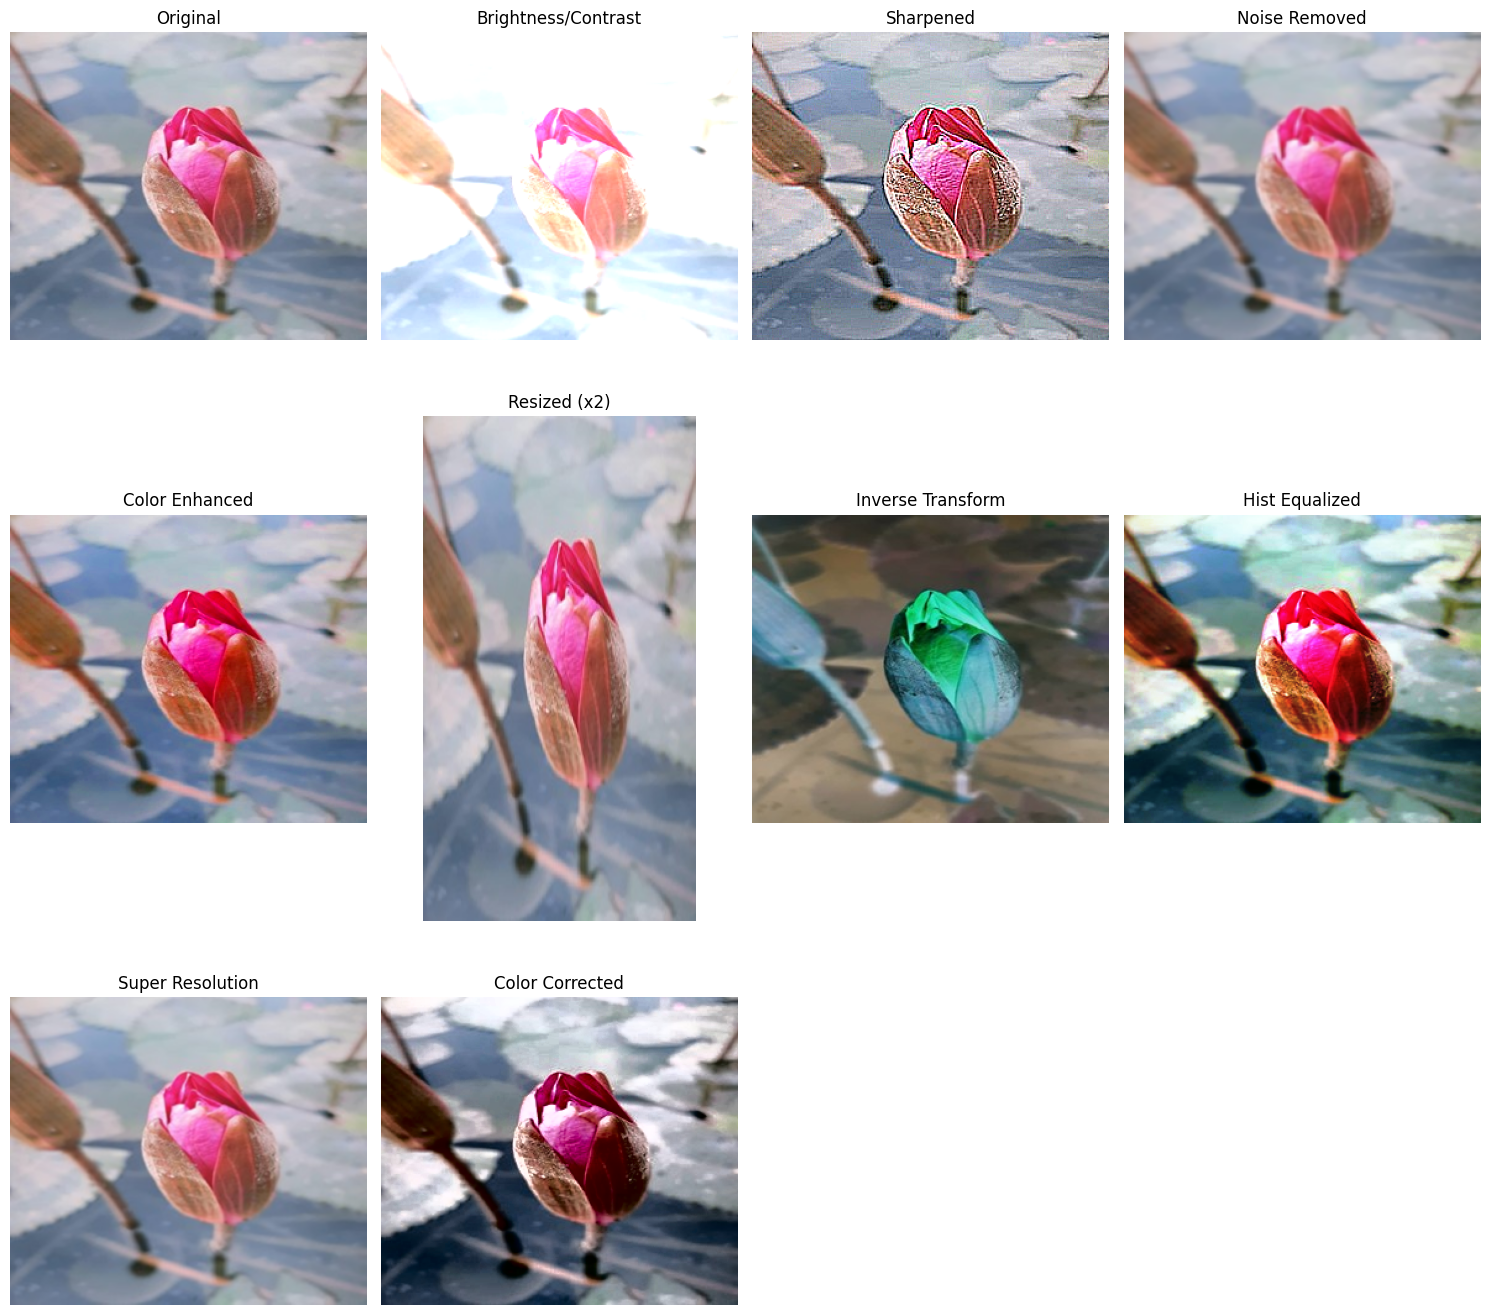

In [ ]:
class ImageEnhancer:
    def __init__(self, image_path):
        """Initialize with image path and load the image."""
        self.image_path = image_path
        try:
            self.original_image = cv2.imread(self.image_path, cv2.IMREAD_COLOR)
            if self.original_image is None:
                raise FileNotFoundError(f"Could not load image at {self.image_path}")
        except Exception as e:
            print(f"Error loading image: {e}")
            raise

    def adjust_brightness_contrast(self, brightness=50, contrast=1.5):
        """Adjust brightness and contrast."""
        enhanced = cv2.convertScaleAbs(self.original_image, alpha=contrast, beta=brightness)
        return enhanced

    def sharpen_image(self):
        """Sharpen the image using a kernel."""
        kernel = np.array([[-1, -1, -1],
                          [-1,  9, -1],
                          [-1, -1, -1]])
        sharpened = cv2.filter2D(self.original_image, -1, kernel)
        return sharpened

    def remove_noise(self):
        """Remove noise using Gaussian blur."""
        denoised = cv2.GaussianBlur(self.original_image, (5, 5), 0)
        return denoised

    def enhance_color(self):
        """Enhance color by adjusting HSV saturation."""
        hsv = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        s = cv2.convertScaleAbs(s, alpha=1.5)
        enhanced_hsv = cv2.merge([h, s, v])
        enhanced = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)
        return enhanced

    def resize_image(self, scale_factor=2.0):
        """Resize image using INTER_CUBIC interpolation."""
        try:
            height, width = self.original_image.shape[:2]
            scale_x = 0.7
            scale_y = 1.5

            new_width = int(width * scale_x)
            new_height = int(height * scale_y)
            # new_height, new_width = int(height * scale_factor), int(width * scale_factor)
            resized = cv2.resize(self.original_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
            return resized
        except Exception as e:
            print(f"Error resizing image: {e}")
            return self.original_image

    def inverse_transform(self):
        """Invert colors by subtracting from 255."""
        inverted = 255 - self.original_image
        return inverted

    def equalize_histogram(self):
        """Equalize histogram for each channel."""
        b, g, r = cv2.split(self.original_image)
        b_eq = cv2.equalizeHist(b)
        g_eq = cv2.equalizeHist(g)
        r_eq = cv2.equalizeHist(r)
        equalized = cv2.merge([b_eq, g_eq, r_eq])
        return equalized

    def super_resolution(self):
        """Apply simple super-resolution using pyrUp."""
        upscaled = cv2.pyrUp(self.original_image)
        return upscaled

    def color_correction(self):
        """Perform basic color correction (white balance simulation)."""
        lab = cv2.cvtColor(self.original_image, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        l = cv2.equalizeHist(l)
        corrected_lab = cv2.merge([l, a, b])
        corrected = cv2.cvtColor(corrected_lab, cv2.COLOR_LAB2BGR)
        return corrected

    def visualize_all(self):
        """Visualize all enhancements in a grid layout."""
        # Create all enhanced images
        enhanced_images = {
            "Original": self.original_image,
            "Brightness/Contrast": self.adjust_brightness_contrast(),
            "Sharpened": self.sharpen_image(),
            "Noise Removed": self.remove_noise(),
            "Color Enhanced": self.enhance_color(),
            "Resized (x2)": self.resize_image(),
            "Inverse Transform": self.inverse_transform(),
            "Hist Equalized": self.equalize_histogram(),
            "Super Resolution": self.super_resolution(),
            "Color Corrected": self.color_correction()
        }

        # Create subplot grid
        plt.figure(figsize=(15, 15))
        for i, (title, img) in enumerate(enhanced_images.items(), 1):
            plt.subplot(3, 4, i)  # 3 rows, 4 columns
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(title)
            plt.axis('off')

        plt.tight_layout()
        plt.show()

def process_image(image_path):
    """Process the image with all enhancement techniques."""
    try:
        enhancer = ImageEnhancer(image_path)
        enhancer.visualize_all()
    except Exception as e:
        print(f"Error processing image: {e}")

def main():
    image_path = "/content/flower.jpg"
    print(f"Processing {image_path}")
    process_image(image_path)

if __name__ == "__main__":
    main()